<a href="https://colab.research.google.com/github/odaliselizondo/Modelado-y-simulaci-n-de-sistemas-mecatronicos/blob/main/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%
clc;
clear all;
close all;
%parametros de simulacion:
ti=0; %tiempo inicial
h=0.0025; %incremento del tiempo
tf=10; %tiempo final de simulacion
ts=ti:h:tf; %tiempo de simulacion
opciones=odeset('RelTol'1e-3,'InitialStep',2.5e-3,'MaxStep',2.5e-3);
[t,x]=ode45('cap5_robot2gdl',ts,[0;0;0;0], opciones);
plot(t,(180/pi)*x(:,1),t,(180/pi)*x(:,2))
%

SyntaxError: invalid syntax (<ipython-input-1-6aee60fc2333>, line 3)

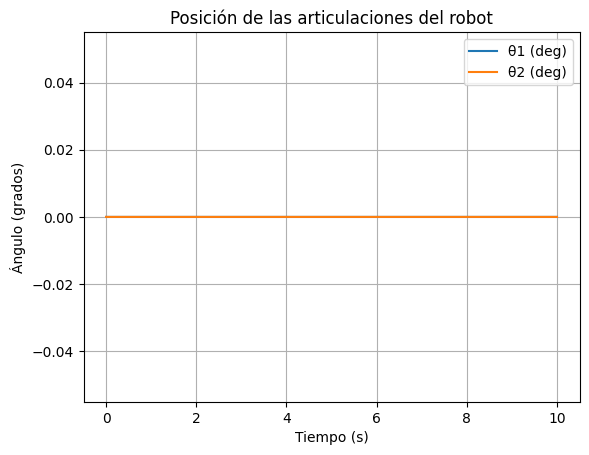

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros de simulación
ti = 0
tf = 10
h = 0.0025
ts = np.arange(ti, tf+h, h)

# Definir el sistema dinámico (similar a 'cap5_robot2gdl')
def robot_dinamica(t, x):
    # Aquí debes implementar las ecuaciones diferenciales del robot
    # Ejemplo ficticio para mostrar formato:
    # x = [theta1, theta2, dtheta1, dtheta2]
    dtheta1 = x[2]
    dtheta2 = x[3]
    ddtheta1 = -0.5 * x[2]
    ddtheta2 = -0.3 * x[3]
    return [dtheta1, dtheta2, ddtheta1, ddtheta2]

# Condiciones iniciales: [theta1, theta2, dtheta1, dtheta2]
x0 = [0, 0, 0, 0]

# Ejecutar simulación
sol = solve_ivp(robot_dinamica, [ti, tf], x0, t_eval=ts, rtol=1e-3, first_step=h, max_step=h)

# Visualización
theta1_deg = np.rad2deg(sol.y[0])
theta2_deg = np.rad2deg(sol.y[1])

plt.plot(sol.t, theta1_deg, label='θ1 (deg)')
plt.plot(sol.t, theta2_deg, label='θ2 (deg)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.title('Posición de las articulaciones del robot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%
%robot de transmision directa de 2gdl
function xp= cap5_robot2gdl(t,x)
q=[x(1);x(2)];
%vector de velocidad articular
qp={x(3);x(4)};
%modelo dinamico del robot
%matriz de inercia
M=[3.117+0.2*cos(q(2))0.108+0.1*cos(q(2)); 0.108+0.1*cos(q(2))0.108];
%Matriz de fuerzas centripetas y de coriolis
C=[-0.2*sin(q(2))*qp(2)-0.1*sin(q(2))*qp(2); 0.1*sin(q(2))*qp(1)0.0;
0.1*sin(q(2))*qp(1) 0.0];

%vector de pares gravitacionales
par grav= [39.3*sin(q(1))+1.95*sin(q(1)+q(2));
           1.95*sin(q(1)+q(2))];

%vector de pares de friccion viscosa
fr=[1.86*qp(1)+1.93*signo(qp(1));
    0.16*qp(2)+0.3*signo(qp(2))];
tau=[(1-exp(-0.8*t))*32.0+56*sin(16*t+0.1)+12*sin(20*t+0.15);
     (1-exp(-1.8*t))*1.2+8*sin(26*t+0.08)+2*sin(12*t+0.34)];
%vector de aceleracion articular
q2p=inv(M)*(tau-C*qp-par_grav-fr);
%vector de salida
xp=[qp(1);qp(2);q2p(1);q2p(2)];
%
%
%


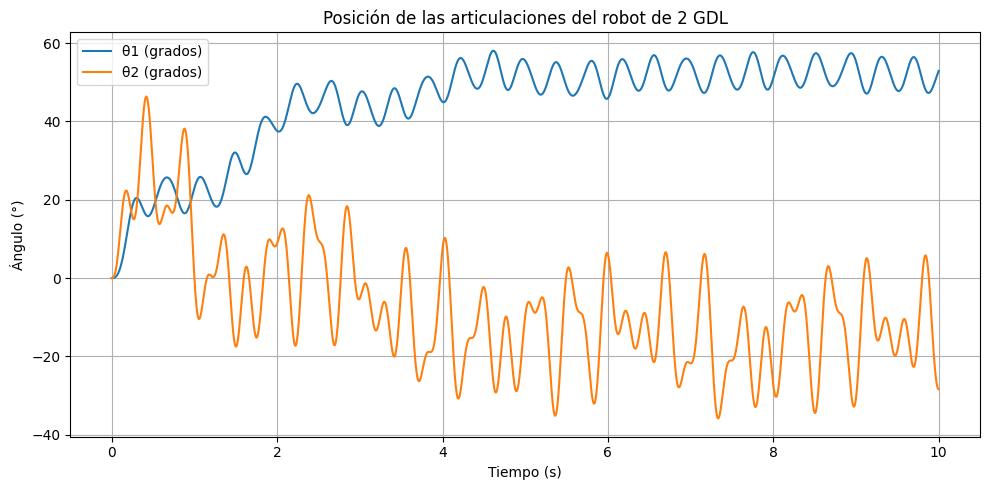

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función signo
def signo(x):
    return np.sign(x)

# Definición del modelo dinámico del robot
def robot_dinamica(t, x):
    q1, q2, dq1, dq2 = x
    q = np.array([q1, q2])
    qp = np.array([dq1, dq2])

    # Matriz de inercia M(q)
    M11 = 3.117 + 0.2 * np.cos(q2)
    M12 = 0.108 + 0.1 * np.cos(q2)
    M21 = M12
    M22 = 0.108
    M = np.array([[M11, M12],
                  [M21, M22]])

    # Matriz de Coriolis y centrífugas (simplificada como un producto: C*qp)
    C = np.array([
        [-0.2 * np.sin(q2) * dq2 - 0.1 * np.sin(q2) * dq2, 0],
        [ 0.1 * np.sin(q2) * dq1,                         0]
    ])

    # Vector de pares gravitacionales
    par_grav = np.array([
        39.3 * np.sin(q1) + 1.95 * np.sin(q1 + q2),
        1.95 * np.sin(q1 + q2)
    ])

    # Vector de fricción viscosa
    fr = np.array([
        1.86 * dq1 + 1.93 * signo(dq1),
        0.16 * dq2 + 0.3 * signo(dq2)
    ])

    # Torque de entrada
    tau = np.array([
        (1 - np.exp(-0.8 * t)) * 32.0 + 56 * np.sin(16 * t + 0.1) + 12 * np.sin(20 * t + 0.15),
        (1 - np.exp(-1.8 * t)) * 1.2 + 8 * np.sin(26 * t + 0.08) + 2 * np.sin(12 * t + 0.34)
    ])

    # Aceleraciones articulares
    qpp = np.linalg.inv(M).dot(tau - C.dot(qp) - par_grav - fr)

    return [dq1, dq2, qpp[0], qpp[1]]

# Simulación
ti = 0
tf = 10
h = 0.0025
ts = np.arange(ti, tf + h, h)
x0 = [0, 0, 0, 0]  # [q1, q2, dq1, dq2]

sol = solve_ivp(robot_dinamica, [ti, tf], x0, t_eval=ts, rtol=1e-3, first_step=h, max_step=h)

# Visualización
theta1_deg = np.rad2deg(sol.y[0])
theta2_deg = np.rad2deg(sol.y[1])

plt.figure(figsize=(10, 5))
plt.plot(sol.t, theta1_deg, label='θ1 (grados)')
plt.plot(sol.t, theta2_deg, label='θ2 (grados)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (°)')
plt.title('Posición de las articulaciones del robot de 2 GDL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
